В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [577]:
%reload_ext autoreload
%autoreload 2

from process_bank_churn_ import preprocess_data

In [579]:
import pandas as pd

In [581]:
raw_df = pd.read_csv("train.csv")
data = preprocess_data(raw_df)

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Binary columns: ['IsActiveMember', 'HasCrCard']
Categorical columns: ['Geography', 'Gender']


In [585]:
preprocessed_data = preprocess_data(raw_df, scaler_numeric=False)

X_train = preprocessed_data['X_train']
train_targets = preprocessed_data['train_targets']
X_val = preprocessed_data['X_val']
val_targets = preprocessed_data['val_targets']
input_cols = preprocessed_data['input_cols']
scaler = preprocessed_data['scaler']
encoder = preprocessed_data['encoder']

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Binary columns: ['IsActiveMember', 'HasCrCard']
Categorical columns: ['Geography', 'Gender']


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

1. Натренуйте дерево прийняття рішень з зафіксованим random_state і з рештою аргументів за замовченням.

In [589]:
from sklearn.tree import DecisionTreeClassifier

In [591]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [593]:
train_acc = model.score(X_train, train_targets)
val_acc = model.score(X_val, val_targets)
train_acc, val_acc

(1.0, 0.842)

In [595]:
train_targets.value_counts() / len(train_targets)

Exited
0.0    0.7965
1.0    0.2035
Name: count, dtype: float64

In [597]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

Порівнюючи тренувальні та валідац. дані ми бачимо однакову розбивку, що 0.79% клієнтів - не покинули банк. 0.20% клієнтів - покинули банк.
Є ознаки перенавчання моделі

2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?

In [601]:
from sklearn.metrics import roc_auc_score

#Отримуємо ймовірності
y_train_proba = model.predict_proba(X_train)[:, 1]
y_val_proba = model.predict_proba(X_val)[:, 1]

#ROC AUC
train_auc = roc_auc_score(train_targets, y_train_proba)
val_auc = roc_auc_score(val_targets, y_val_proba)

print(f"Train ROC AUC: {train_auc:.3f}")
print(f"Validation ROC AUC: {val_auc:.3f}")


Train ROC AUC: 1.000
Validation ROC AUC: 0.774


Тут ми бачимо, що тренувальні дані на 100% класифікуються, валідаційні -77%. Що є підтвердженням перенавчання моделі на тренувальних даних

3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?

In [605]:
model.tree_.max_depth

26

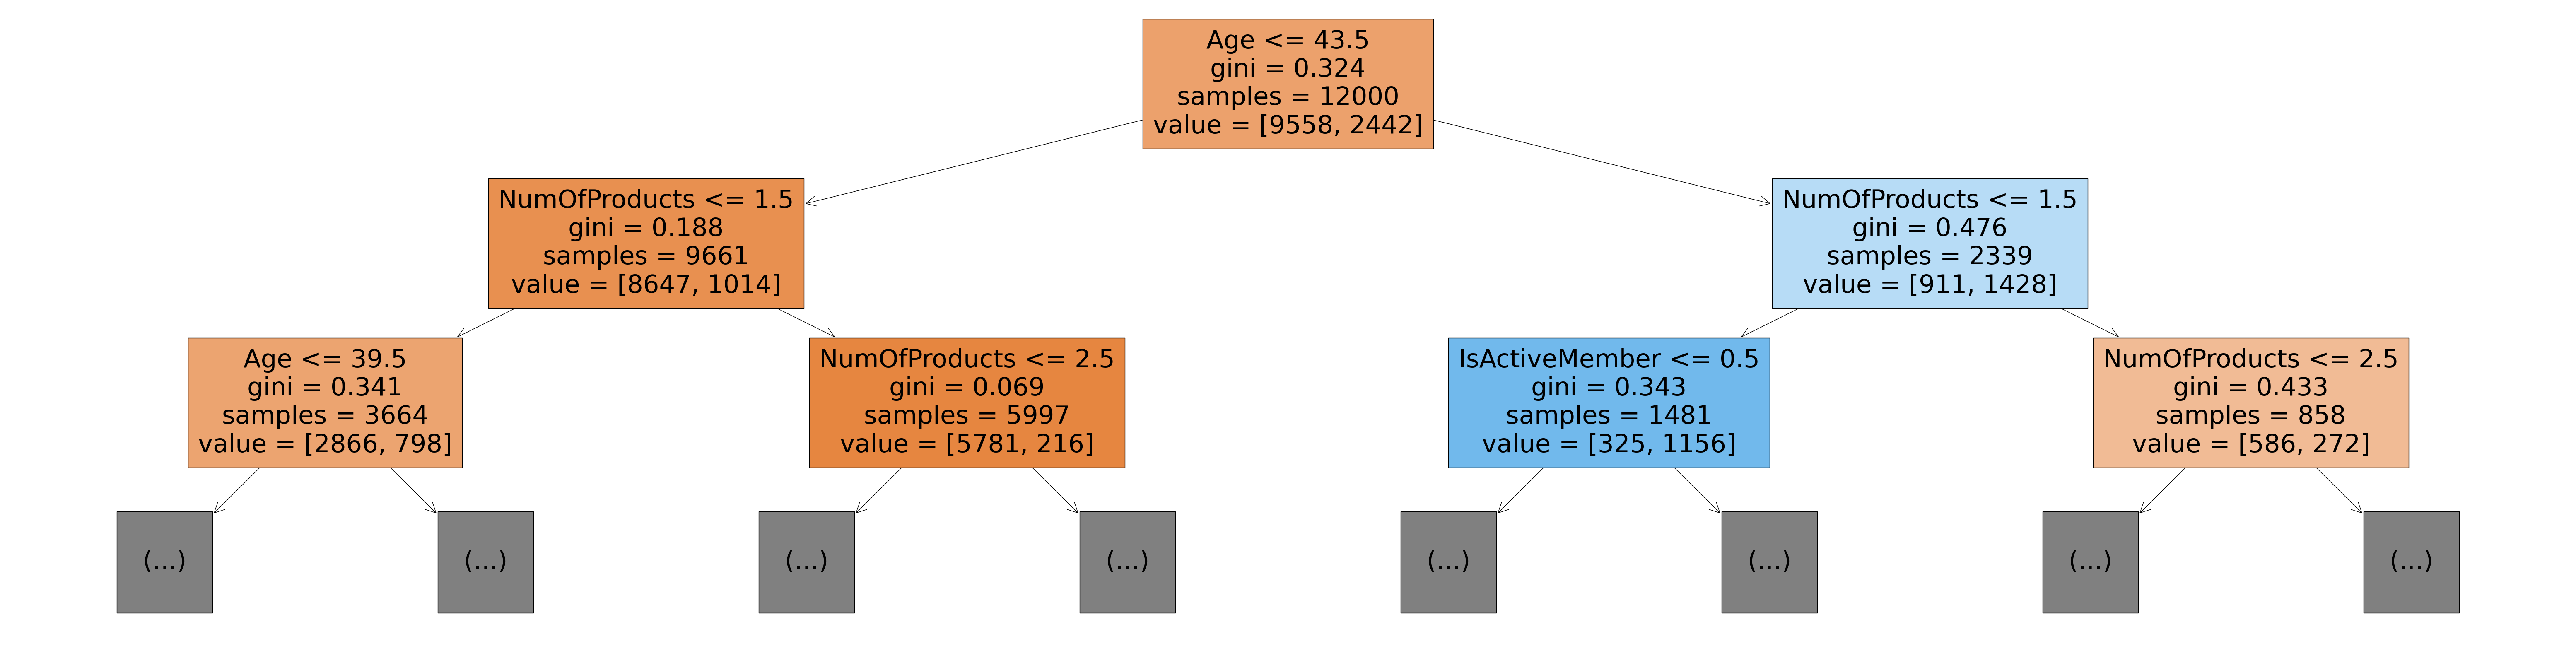

In [607]:
import matplotlib.pyplot as plt

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [608]:
from sklearn.tree import plot_tree, export_text

tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- Age <= 39.50
|   |   |   |--- truncated branch of depth 24
|   |   |--- Age >  39.50
|   |   |   |--- truncated branch of depth 19
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 17
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1.0



5. Створіть датафрейм importance_df з feature importances, де в першому стовпчику feature - назва ознаки з нашого Х, а в другому importance - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [612]:
importance_df = pd.DataFrame({
    'feature': X_train.columns, 
    'importance': model.feature_importances_}).sort_values('importance', ascending=False)
#importance_df

In [614]:
import seaborn as sns

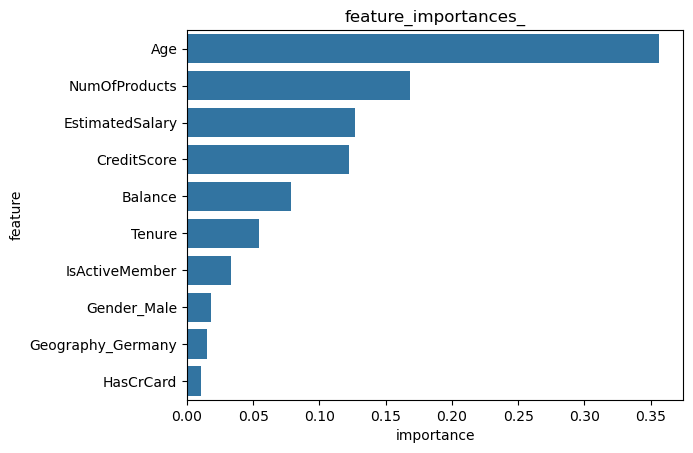

In [616]:
plt.title('feature_importances_')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

1-Спосіб. max_depth

In [620]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [622]:
#Отримуємо ймовірності
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

#ROC AUC
train_auc = roc_auc_score(train_targets, y_train_probs)
val_auc = roc_auc_score(val_targets, y_val_probs)

print(f"Train ROC AUC: {train_auc:.3f}")
print(f"Validation ROC AUC: {val_auc:.3f}")


Train ROC AUC: 0.926
Validation ROC AUC: 0.922


Для max_depth я спробувала такі варіанти:
1) коли max_depth = 10 значення становили: Train ROC AUC: 0.970 та Validation ROC AUC: 0.848. Між показниками суттєвий розрив, Train ROC AUC прямує до 1.0, що може казати нам про перетренування моделі. Тобто max_depth=10 нам точно не підходить.
2) коли max_depth = 5 значення становили:Train ROC AUC: 0.926 та Validation ROC AUC: 0.922. Між показниками різниця в 0.02, ця різниця цілком задовільна при цьому ж Validation ROC AUC має високе значення порівнюючи навіть з попереднім.
3) при max_depth < 5 та max_depth > 5 Validation ROC AUC вже не стає більшим ніж 0.922.
4) 
   Тому тут я би зупинилась на глибині max_depth = 5

2-Спосіб. max_leaf_nodes

In [626]:
model = DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)

model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)

In [628]:
#Отримуємо ймовірності
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

#ROC AUC
train_auc = roc_auc_score(train_targets, y_train_probs)
val_auc = roc_auc_score(val_targets, y_val_probs)

print(f"Train ROC AUC: {train_auc:.3f}")
print(f"Validation ROC AUC: {val_auc:.3f}")

Train ROC AUC: 0.929
Validation ROC AUC: 0.924


При виборі кількості листових вузлів для max_leaf_nodes все що більше 100 не дає Validation ROC AUC: більше 0.912, при цьому Train ROC AUC не дорівнював 1.0.
Максимальне значення Validation ROC AUC: 0.922 при max_leaf_nodes=40 в той самий момент Train ROC AUC: 0.929.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [632]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [634]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [635]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.160417,0.177333
1,2,0.134250,0.139000
2,3,0.118500,0.125333
3,4,0.112750,0.118000
4,5,0.104750,0.112667
5,6,0.095917,0.109000
6,7,0.092250,0.110333
7,8,0.081833,0.109667
8,9,0.073667,0.115333
9,10,0.064417,0.118333


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


1

In [640]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [642]:
#Отримуємо ймовірності
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

#ROC AUC
train_auc = roc_auc_score(train_targets, y_train_probs)
val_auc = roc_auc_score(val_targets, y_val_probs)

print(f"Train ROC AUC: {train_auc:.3f}")
print(f"Validation ROC AUC: {val_auc:.3f}")

Train ROC AUC: 0.934
Validation ROC AUC: 0.920


2-6

In [645]:
test_raw_df = pd.read_csv("test.csv")

In [647]:
from process_bank_churn_ import preprocess_new_data

In [649]:
preprocessed_test_df = preprocess_new_data(test_raw_df, scaler, encoder, scaler_numeric=False)

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Binary columns: ['IsActiveMember', 'HasCrCard']
Categorical columns: ['Geography', 'Gender']


In [651]:
preprocessed_test_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,1.0


In [653]:
print("Колонки train:", X_train.columns.tolist())
print("Колонки test:", preprocessed_test_df.columns.tolist())


Колонки train: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
Колонки test: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [661]:
sample_submission = pd.read_csv('sample_submission.csv')

In [663]:

test_preds = model.predict_proba(preprocessed_test_df)[:, 1]

print(test_preds)
sample_submission['Exited'] = test_preds

[0.17120623 0.03942181 0.01578947 ... 0.00397    0.04022526 0.28105906]


In [665]:
sample_submission.to_csv('submission_log_reg.csv', index=False)

Скрін додаю у дз на платформі